In [74]:
import praw

reddit = praw.Reddit(
    client_id="Phur54GwG8OUDA6FrkNGdw",
    client_secret="cgRL_UaMAM03usFuR_ZAJ0eBBt1WeQ",
    user_agent = "MyRedditApp v1.0 by /u/rami95132"
)

In [85]:
# Define the keyword or topic related to the stock market you want to search for
search_query = "stock market"  # You can change this to your specific query

# Use the Reddit API to search for posts containing the specified query
search_results = reddit.subreddit("all").search(search_query, limit=1000)  # Limit the results to the top 10 matches


In [ ]:
nltk.download('stopwords')

# Initialize NLTK stop words
stop_words = set(stopwords.words('english'))

In [86]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob



# Initialize variables for sentiment analysis
c = 0
pol = 0
p = 0
n = 0
nu = 0

# Iterate through the search results and collect comments
for post in search_results:
    for comment in post.comments:
        try:
            c += 1

            # Tokenize the comment text into words
            words = TextBlob(comment.body).words

            # Remove stop words
            filtered_words = [word for word in words if word.lower() not in stop_words]

            # Join the filtered words back into a sentence
            cleaned_comment = ' '.join(filtered_words)

            # Perform sentiment analysis on the cleaned comment
            analysis = TextBlob(cleaned_comment)

            pol += analysis.sentiment.polarity

            if analysis.sentiment.polarity == 0:
                nu += 1
            elif analysis.sentiment.polarity < 0:
                n += 1
            else:
                p += 1
        except Exception as e:
            print("Error analyzing comment:", str(e))
            
# Print the sentiment analysis results
print("Total Comments:", c)
print("Positive Comments:", p)
print("Negative Comments:", n)
print("Neutral Comments:", nu)
print("Total Polarity:", pol)

        

[nltk_data] Downloading package stopwords to /Users/helen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error analyzing comment: 'MoreComments' object has no attribute 'body'
Error 

In [87]:
print(p/c)
print(n/c)
print(nu/c)
print(pol)

0.3578785797956134
0.2183624833380458
0.42072949064910936
1210.2573363829858


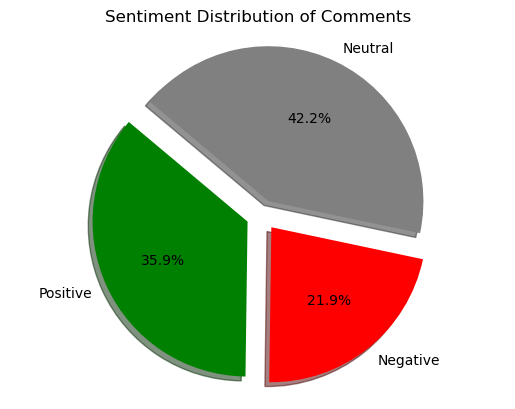

In [88]:
import matplotlib.pyplot as plt

# Calculate the ratios
total_comments = p + n + nu
ratio_positive = p / total_comments
ratio_negative = n / total_comments
ratio_neutral = nu / total_comments

# Create a pie chart
labels = 'Positive', 'Negative', 'Neutral'
sizes = [ratio_positive, ratio_negative, ratio_neutral]
colors = ['green', 'red', 'gray']
explode = (0.1, 0.1, 0.1)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title("Sentiment Distribution of Comments")
plt.show()


In [78]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/helen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

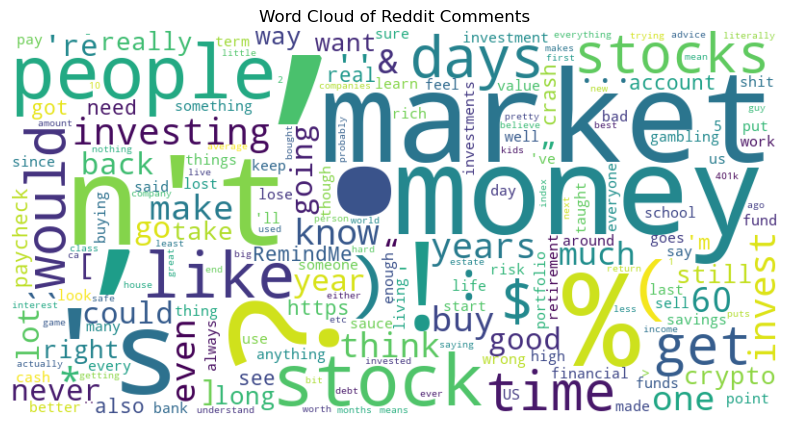

In [79]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Initialize variables for word frequency
word_freq = {}

# Iterate through the search results and collect comments
for post in search_results:
    
    post.comments.replace_more(limit=None)  # Retrieve all comments including hidden ones
    for comment in post.comments.list():
        # Tokenize the comment text into words
        words = word_tokenize(comment.body)
        # Remove stopwords (common words like "the," "and," "is," etc.)
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word.lower() not in stop_words]
        # Count the frequency of each word
        for word in filtered_words:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reddit Comments")
plt.show()